In [1]:
using Pkg
Pkg.activate("../Dynamic_brittle_fracture")
Pkg.instantiate()
Pkg.status()

  Activating project at `~/Library/CloudStorage/OneDrive-IndianInstituteofTechnologyBhubaneswar/Dynamic-Fracture/Dynamic_brittle_fracture`


Status `~/Library/CloudStorage/OneDrive-IndianInstituteofTechnologyBhubaneswar/Dynamic-Fracture/Dynamic_brittle_fracture/Project.toml`
  [705231aa] Gmsh v0.2.2
  [56d4f2e9] Gridap v0.17.16
  [3025c34a] GridapGmsh v0.6.1
  [7073ff75] IJulia v1.24.0
  [91a5bcdd] Plots v1.38.5
  [37e2e46d] LinearAlgebra


In [ ]:
using Gmsh: gmsh
using GridapGmsh
using Gridap
using Gridap.Geometry
using Gridap.TensorValues
using Plots
using LinearAlgebra
using Gridap.ReferenceFEs
using Gridap.Arrays

In [2]:
I2 = one(TensorValue{2,2,Float64})
I4_sym = one(SymFourthOrderTensorValue{2,Float64})
I4_vol = (1.0/2)*I4_sym
I4_dev = I4_sym - I4_vol

SymFourthOrderTensorValue{2, Float64, 9}(0.5, 0.0, 0.0, 0.0, 0.25, 0.0, 0.0, 0.0, 0.5)

In [3]:
const ls = 0.195 #0.667

0.195

In [4]:
const L = 100
const H = 100
const CP = H/4
const CL = 0.5*H 
const CH = L/1000
const hfc = ls/50
const hf = ls/0.9
const h = 10*hf 
const FMR = 5*ls


gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h)
p2 = gmsh.model.geo.addPoint(L-hf, 0.0, 0.0, h)
p3 = gmsh.model.geo.addPoint(L, 0.0, 0.0, h)
p4 = gmsh.model.geo.addPoint(L, hf, 0.0, h)
p5 = gmsh.model.geo.addPoint(L, H, 0.0, h)
p6 = gmsh.model.geo.addPoint(L-3*h, H, 0.0, hfc)
p7 = gmsh.model.geo.addPoint(0.0, H, 0.0, h)
p8 = gmsh.model.geo.addPoint(0.0, CP+CH, 0.0, h)
p9 = gmsh.model.geo.addPoint(CL, CP+CH, 0.0, hfc)
p10 = gmsh.model.geo.addPoint(CL, CP-CH, 0.0, hfc)
p11 = gmsh.model.geo.addPoint(0.0, CP-CH, 0.0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p5)
l5 = gmsh.model.geo.addLine(p5, p6)
l6 = gmsh.model.geo.addLine(p6, p7)
l7 = gmsh.model.geo.addLine(p7, p8)
l8 = gmsh.model.geo.addLine(p8, p9)
l9 = gmsh.model.geo.addLine(p9, p10)
l10 = gmsh.model.geo.addLine(p10, p11)
l11 = gmsh.model.geo.addLine(p11, p1)

cl = gmsh.model.geo.addCurveLoop([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11]) 
ps = gmsh.model.geo.addPlaneSurface([cl])
pg1 = gmsh.model.addPhysicalGroup(2, [ps])
pg2 = gmsh.model.addPhysicalGroup(1, [l1])
pg3 = gmsh.model.addPhysicalGroup(1, [l2,l3])
pg4 = gmsh.model.addPhysicalGroup(1, [l11])

gmsh.model.setPhysicalName(2, pg1, "Domain")
gmsh.model.setPhysicalName(1, pg2, "RollerSupport")
gmsh.model.setPhysicalName(1, pg3, "FixedSupport")
gmsh.model.setPhysicalName(1, pg4, "LoadLine")

l12 = gmsh.model.geo.addLine(p9, p6)

gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "EdgesList", [l12])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", hf)
gmsh.model.mesh.field.setNumber(2, "LcMax", h)
gmsh.model.mesh.field.setNumber(2, "DistMin", 0.22*L)
gmsh.model.mesh.field.setNumber(2, "DistMax", 0.23*L)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("KalthofWinkler.msh")
gmsh.finalize()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.0218234s, CPU 0.021126s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 2.09145s, CPU 2.07053s)
Info    : 132962 nodes 243725 elements
Info    : Writing 'KalthofWinkler.msh'...
Info    : Done writing 'KalthofWinkler.msh'


In [5]:
model = GmshDiscreteModel("KalthofWinkler.msh")
writevtk(model,"KalthofWinkler")

Info    : Reading 'KalthofWinkler.msh'...
Info    : 24 entities
Info    : 110753 nodes
Info    : [ 10%] Reading nodes                                          
Info    : [ 20%] Reading nodes                                          
Info    : [ 30%] Reading nodes                                          
Info    : [ 40%] Reading nodes                                          
Info    : [ 50%] Reading nodes                                          
Info    : [ 60%] Reading nodes                                          
Info    : [ 70%] Reading nodes                                          
Info    : [ 80%] Reading nodes                                          
Info    : [ 90%] Reading nodes                                          
Info    : [100%] Reading nodes                                          
                                          
Info    : 220518 elements
Info    : [ 10%] Reading elements                                          
Info    : [ 20%] Reading elements     

3-element Vector{Vector{String}}:
 ["KalthofWinkler_0.vtu"]
 ["KalthofWinkler_1.vtu"]
 ["KalthofWinkler_2.vtu"]

In [6]:
const E_mat = 190e3
const ν_mat = 0.3   
const ρ = 8000e-9

G₁₂_mat = E_mat/(2*(1+ν_mat))
const μ = G₁₂_mat
const λ = (E_mat*ν_mat)/((1+ν_mat)*(1-2*ν_mat))
const k = λ + μ

J = 0.0

0.0

In [7]:
const Gc = 22.13
const η = 1e-15

1.0e-15

In [8]:
function ElasFourthOrderConstTensor(E₁,E₂,ν₁₂,ν₂₁,G₁₂,PlanarState)
    # 1 for Plane Stress and 2 Plane Strain Condition 
  if PlanarState == 1
      C1111 = E₁/(1-ν₁₂*ν₂₁)
      C1122 = (ν₂₁*E₁)/(1-ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = E₂/(1-ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂     
  elseif PlanarState == 2
      C1111 = (E₁*(1-ν₁₂*ν₂₁))/((1+ν₁₂)*(1-ν₁₂-2*ν₁₂*ν₂₁))
      C1122 = (ν₂₁*E₁)/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C1112 = 0.0
      C2222 = (E₂*(1-ν₁₂))/(1-ν₁₂-2*ν₁₂*ν₂₁)
      C2212 = 0.0
      C1212 = G₁₂ 
  end
  C_ten = SymFourthOrderTensorValue(C1111,C1112,C1122,C1112,C1212,C2212,C1122,C2212,C2222)
    return  C_ten
end
const C_mat = ElasFourthOrderConstTensor(E_mat,E_mat,ν_mat,ν_mat,G₁₂_mat,2)

SymFourthOrderTensorValue{2, Float64, 9}(255769.23076923075, 0.0, 109615.38461538461, 0.0, 73076.92307692308, 0.0, 109615.38461538461, 0.0, 255769.23076923075)

In [9]:
### Spectral

function σ_mod(ε, ε_in, s_in)
            σM = (s_in^2 + η)*(λ*tr(ε)*one(ε) + 2*μ*(ε))
    return σM
end

σ_mod (generic function with 1 method)

In [10]:
### Spectral

function Eigen(ε)
    εArray = get_array(ε)
    Λ, P = eigen(εArray)
    ε1 = Λ[1]
    ε2 = Λ[2]
    if ε1 >= 0 &&  ε2 >= 0
        Λpos = [ε1 0; 0 ε2]
        Λneg = [0 0; 0 0]
    elseif ε1 >= 0 &&  ε2 < 0
        Λpos = [ε1 0; 0 0]
        Λneg = [0 0; 0 ε2]
    elseif ε1 < 0 &&  ε2 >= 0
        Λpos = [0 0; 0 ε2]
        Λneg = [ε1 0; 0 0]
    elseif ε1 < 0 &&  ε2 < 0
        Λpos = [0 0; 0 0]
        Λneg = [ε1 0; 0 ε2]
    end 
   εPos = P*Λpos*P'
   εNeg = P*Λneg*P'
   EpPos = TensorValue(εPos)
   EpNeg = TensorValue(εNeg)    
    return  EpPos, EpNeg
end


Eigen (generic function with 1 method)

In [11]:
### Spectral

function ψPos(ε_in)
    ϵ_Pos, ϵ_Neg = Eigen(ε_in)
    if tr(ε_in) >= 0 
        ψPlus = 0.5*λ*(tr(ε_in))^2 + μ*(ϵ_Pos ⊙ ϵ_Pos) 
    elseif tr(ε_in) < 0
        ψPlus = μ*(ϵ_Pos ⊙ ϵ_Pos)
    end
    return ψPlus
end

ψPos (generic function with 1 method)

In [12]:
function new_EnergyState(ψPlusPrev_in,ψhPos_in)
  ψPlus_in = ψhPos_in
  if ψPlus_in >= ψPlusPrev_in
    ψPlus_out = ψPlus_in
  else
    ψPlus_out = ψPlusPrev_in
  end
  true,ψPlus_out
end

new_EnergyState (generic function with 1 method)

In [13]:
function project(q,model,dΩ,order)
  reffe = ReferenceFE(lagrangian,Float64,order)
  V = FESpace(model,reffe,conformity=:L2)
  a(u,v) = ∫( u*v )*dΩ
  l(v) = ∫( v*q )*dΩ
  op = AffineFEOperator(a,l,V,V)
  qh = solve(op)
  qh
end

project (generic function with 1 method)

In [14]:
order = 1
degree = 2*order

2

In [15]:
Ω = Triangulation(model)
dΩ = Measure(Ω,degree)

Measure()

In [16]:
labels = get_face_labeling(model)
LoadTagId = get_tag_from_name(labels,"LoadLine")
Γ_Load = BoundaryTriangulation(model,tags = LoadTagId)
dΓ_Load = Measure(Γ_Load,degree)
n_Γ_Load = get_normal_vector(Γ_Load)

GenericCellField():
 num_cells: 12
 DomainStyle: ReferenceDomain()
 Triangulation: BoundaryTriangulation()
 Triangulation id: 18009904464275246975

In [17]:
reffe_PF = ReferenceFE(lagrangian,Float64,order)
V0_PF = TestFESpace(model,reffe_PF;
  conformity=:H1)
U_PF = TrialFESpace(V0_PF)

UnconstrainedFESpace()

In [18]:
reffe_Disp = ReferenceFE(lagrangian,VectorValue{2,Float64},order)
        V0_Disp = TestFESpace(model,reffe_Disp;
          conformity=:H1,
          dirichlet_tags=["LoadLine","RollerSupport","FixedSupport"],
          dirichlet_masks=[(true,false),(false,true),(true,true)])

uh = uh₈ = uh₉ = uh₁₀ = vh = ah = zero(V0_Disp)
initial_value = zero(V0_Disp)

SingleFieldFEFunction():
 num_cells: 220457
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 780940097372305032

In [19]:
function  stepPhaseField(uh_in,ψPlusPrev_in)
        
        a_PF(s,ϕ) = ∫( Gc*ls*∇(ϕ)⋅ ∇(s) + 2*ψPlusPrev_in*s*ϕ + (Gc/ls)*s*ϕ )*dΩ
        b_PF(ϕ) = ∫( (Gc/ls)*ϕ )*dΩ
        op_PF = AffineFEOperator(a_PF,b_PF,U_PF,V0_PF)
        sh_out = solve(op_PF)           
    
    return sh_out
    
end

stepPhaseField (generic function with 1 method)

In [20]:
function   stepDisp(uh_in, sh_in, count, time, T1, dt, v₀, uh, vh, ah)
        
        function uapp(x,t, time,T1, v₀)
           if time<=T1
              return VectorValue(1,0.0)*((v₀/(2*T1))*t^2)
           else
              return VectorValue(1,0.0)*((v₀*t) - (v₀*T1/2))
           end
        end
    
        g(x,t) = VectorValue(x[1]*0,x[2]*0)*t
        g(t::Real) = x-> g(x,t)
    
        t0 = time-dt
        tF = time
        Δt = dt/10
    
        Uapp(x,t) = uapp(x,t, time, T1, v₀)
        Uapp(t::Real) = x -> Uapp(x,t)
    
        U_Disp = TransientTrialFESpace(V0_Disp,[Uapp,g,g])

        f(t) = VectorValue(0.0,0.0)
        m(utt,w) = ρ*∫(utt⋅w)dΩ
        c(ut,w) = ∫(ut⋅w)dΩ
            
        a_Disp(u,w) = ∫( (ε(w) ⊙ (σ_mod∘(ε(u),ε(uh_in),sh_in)) ) )*dΩ
        b_Disp(w,t) = ∫(w⋅f(t))dΩ
    
        res(t,u,w) = m(∂tt(u),w) + a_Disp(u,w) - b_Disp(w,t)
        jac(t,u,du,w) = a_Disp(du,w)
        jac_t(t,u,dut,w) = c(dut,w)
        jac_tt(t,u,dutt,w) = m(dutt,w)

        op = TransientFEOperator(res,jac,jac_t,jac_tt,U_Disp,V0_Disp)
    
        γ = 0.5
        β = 0.25

        U0 = U_Disp(t0)
        uh0 = interpolate_everywhere(uh,U0)
        vh0 = interpolate_everywhere(vh,U0)
        ah0 = interpolate_everywhere(ah,U0)

        Ls = LUSolver()
        ode_solver = Newmark(Ls,Δt,γ,β)

       sol_t = solve(ode_solver,op,(uh0,vh0,ah0),t0,tF) 
       
       counter = 0
        
       vApp = Uapp([0.0,CP/2],time)[1]

       for (uₕ,t) in sol_t
          counter = counter + 1
          if counter == 8
            copyto!(uh₈.free_values, copy(uₕ.free_values))
            copyto!(uh₈.dirichlet_values, copy(uₕ.dirichlet_values))
          elseif counter == 9
            copyto!(uh₉.free_values, copy(uₕ.free_values)) 
            copyto!(uh₉.dirichlet_values, copy(uₕ.dirichlet_values))  
          elseif counter == 10
            copyto!(uh₁₀.free_values, copy(uₕ.free_values))
            copyto!(uh₁₀.dirichlet_values, copy(uₕ.dirichlet_values))
            print(" 👍 Doing at time $t") 
          end
       end  
      
        return (vApp, uh₈, uh₉, uh₁₀)

    end

stepDisp (generic function with 1 method)

In [21]:
tApp = 0
vApp = 0.0
v₀ = 16.5e-3
innerMax = 10
cnt = 0
dt1 =  0.1
Tmax = 120
T1 = 1
const tol_lim = 1e-3

Load = Float64[]
Displacement = Float64[]
Xloccrack = Float64[]
Yloccrack = Float64[]
TApp = Float64[]

push!(Load, 0.0)
push!(Displacement, 0.0)
push!(TApp,tApp)

sPrev = CellState(1.0,dΩ)
sh = project(sPrev,model,dΩ,order)
ψPlusPrev = CellState(0.0,dΩ)

CellState():
 num_cells: 220457
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 780940097372305032

In [24]:
while tApp .< Tmax 
    
    if tApp.<=T1 
        dt = dt1
    else
        dt = dt1*10
    end
    
    cnt = cnt .+ 1    
    tApp = tApp + dt
    
    print("\n Entering time step$cnt:", float(tApp))
    
   for inner = 1:innerMax
        
        ψhPlusPrev = project(ψPlusPrev,model,dΩ,order)
        
        RelErr = abs(sum(∫( Gc*ls*∇(sh)⋅ ∇(sh) + 2*ψhPlusPrev*sh*sh + (Gc/ls)*sh*sh)*dΩ-∫( (Gc/ls)*sh)*dΩ))/abs(sum(∫( (Gc/ls)*sh)*dΩ))
        print("\n Relative error = ",float(RelErr))
        
        sh = stepPhaseField(uh,ψhPlusPrev) 
        Δt = dt/10

        if cnt == 1
           global vApp, uh8, uh9, uh = stepDisp(uh, sh, cnt, tApp, T1, dt, v₀, initial_value, initial_value, initial_value)
           global vh9 = (uh9 - uh8)/Δt
           global vh = (uh - uh9)/Δt
           global ah = (vh - vh9)/Δt
        else
           global vApp, uh8, uh9, uh = stepDisp(uh, sh, cnt, tApp, T1, dt, v₀, uh, vh, ah)
           global vh9 = (uh9 - uh8)/Δt
           global vh = (uh - uh9)/Δt
           global ah = (vh - vh9)/Δt
        end
        
        ψhPos_in = ψPos∘(ε(uh))    
        update_state!(new_EnergyState,ψPlusPrev,ψhPos_in)
        
        if  RelErr < 1e-8
            break 
        end      
    end
    
    Node_Force = sum(∫( n_Γ_Load ⋅ (σ_mod∘(ε(uh),ε(uh),sh)) ) *dΓ_Load)
    push!(Load, Node_Force[1])
    push!(Displacement, vApp)
    if cnt<=4000 
       if mod(cnt,5) == 0    
             writevtk(Ω,"results_KalthoffWinkler$cnt",cellfields=
         ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_mod∘(ε(uh),ε(uh),sh)])
        end
    else 
        writevtk(Ω,"results_KalthoffWinkler$cnt",cellfields=
         ["uh"=>uh,"s"=>sh , "epsi"=>ε(uh),"sigma"=>σ_mod∘(ε(uh),ε(uh),sh)])
    end    
end 


 Entering time step1:0.1
 Relative error = 5.050746155927866e-17 👍 Doing at time 0.09999999999999999
 Entering time step2:0.2
 Relative error = 4.923586689700925e-11 👍 Doing at time 0.20000000000000007
 Entering time step3:0.30000000000000004
 Relative error = 7.384961214605232e-10 👍 Doing at time 0.3000000000000001
 Entering time step4:0.4
 Relative error = 3.200189550475344e-9 👍 Doing at time 0.40000000000000013
 Entering time step5:0.5
 Relative error = 8.615972707483096e-9 👍 Doing at time 0.5000000000000001
 Entering time step6:0.6
 Relative error = 1.8167504642791967e-8 👍 Doing at time 0.6000000000000001
 Relative error = 3.303644068441975e-8 👍 Doing at time 0.6000000000000001
 Relative error = 1.4704011972617957e-10 👍 Doing at time 0.6000000000000001
 Entering time step7:0.7
 Relative error = 3.5773660282887025e-17 👍 Doing at time 0.7000000000000001
 Entering time step8:0.7999999999999999
 Relative error = 5.425422348449051e-8 👍 Doing at time 0.8
 Relative error = 8.345637153013

 Relative error = 5.7993623558396526e-6 👍 Doing at time 39.100000000000016
 Relative error = 5.630340541549908e-6 👍 Doing at time 39.100000000000016
 Relative error = 5.5835137317845015e-6 👍 Doing at time 39.100000000000016
 Relative error = 5.572239833645652e-6 👍 Doing at time 39.100000000000016
 Relative error = 5.384022459849114e-6 👍 Doing at time 39.100000000000016
 Entering time step50:40.1
 Relative error = 5.118769868900876e-6 👍 Doing at time 40.100000000000016
 Relative error = 9.950236314450502e-5 👍 Doing at time 40.100000000000016
 Relative error = 7.348322304155433e-6 👍 Doing at time 40.100000000000016
 Relative error = 6.403252431516808e-6 👍 Doing at time 40.100000000000016
 Relative error = 6.420573390431028e-6 👍 Doing at time 40.100000000000016
 Relative error = 6.38891202805533e-6 👍 Doing at time 40.100000000000016
 Relative error = 6.176627217933987e-6 👍 Doing at time 40.100000000000016
 Relative error = 5.9224236198030165e-6 👍 Doing at time 40.100000000000016
 Relative

 Relative error = 2.1948991069015955e-5 👍 Doing at time 60.100000000000016
 Relative error = 2.2160694879118694e-5 👍 Doing at time 60.100000000000016
 Relative error = 2.1872416162361265e-5 👍 Doing at time 60.100000000000016
 Relative error = 2.169348726208882e-5 👍 Doing at time 60.100000000000016
 Relative error = 2.1016993814339122e-5 👍 Doing at time 60.100000000000016
 Relative error = 2.0607816287987854e-5 👍 Doing at time 60.100000000000016
 Entering time step71:61.1
 Relative error = 2.0830895305642712e-5 👍 Doing at time 61.100000000000016
 Relative error = 0.00013564097444344357 👍 Doing at time 61.100000000000016
 Relative error = 2.499031797735099e-5 👍 Doing at time 61.100000000000016
 Relative error = 2.283620434722416e-5 👍 Doing at time 61.100000000000016
 Relative error = 2.2281833058332494e-5 👍 Doing at time 61.100000000000016
 Relative error = 2.2328332337349508e-5 👍 Doing at time 61.100000000000016
 Relative error = 2.2851045010946388e-5 👍 Doing at time 61.100000000000016


 Relative error = 1.6449599701905652e-5 👍 Doing at time 81.09999999999994
 Relative error = 1.6243208743726494e-5 👍 Doing at time 81.09999999999994
 Relative error = 1.557947372711134e-5 👍 Doing at time 81.09999999999994
 Entering time step92:82.1
 Relative error = 1.5094337116376067e-5 👍 Doing at time 82.09999999999994
 Relative error = 0.00011350770185789051 👍 Doing at time 82.09999999999994
 Relative error = 2.0241141927042823e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.6505489911109827e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.6168286923729125e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.5590576209374717e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.5469590223011345e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.531667741505352e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.5471298868622045e-5 👍 Doing at time 82.09999999999994
 Relative error = 1.5396418666563108e-5 👍 Doing at time 82.09999999999994
 Entering ti

 Relative error = 9.364477884854414e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.725614906345118e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.368717223015418e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.400470842706862e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.759634783518214e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.755935316201846e-6 👍 Doing at time 92.09999999999994
 Relative error = 8.33310528200836e-6 👍 Doing at time 92.09999999999994
 Entering time step103:93.1
 Relative error = 8.132864949959215e-6 👍 Doing at time 93.09999999999994
 Relative error = 0.00012071555767577935 👍 Doing at time 93.09999999999994
 Relative error = 1.5858812607905786e-5 👍 Doing at time 93.09999999999994
 Relative error = 8.656733405960272e-6 👍 Doing at time 93.09999999999994
 Relative error = 7.678675748134075e-6 👍 Doing at time 93.09999999999994
 Relative error = 7.563545769049675e-6 👍 Doing at time 93.09999999999994
 Relative error = 7.8

 Relative error = 5.810870952538024e-6 👍 Doing at time 113.09999999999994
 Relative error = 3.6208239524852522e-6 👍 Doing at time 113.09999999999994
 Relative error = 3.2502369348936055e-6 👍 Doing at time 113.09999999999994
 Relative error = 3.1993539915848024e-6 👍 Doing at time 113.09999999999994
 Relative error = 3.1338571527312497e-6 👍 Doing at time 113.09999999999994
 Relative error = 2.9734801569452405e-6 👍 Doing at time 113.09999999999994
 Relative error = 2.772890974333131e-6 👍 Doing at time 113.09999999999994
 Entering time step124:114.1
 Relative error = 2.623939848069026e-6 👍 Doing at time 114.09999999999994
 Relative error = 0.00014907028421002648 👍 Doing at time 114.09999999999994
 Relative error = 1.8557215008816363e-5 👍 Doing at time 114.09999999999994
 Relative error = 5.999798200512287e-6 👍 Doing at time 114.09999999999994
 Relative error = 3.5760575744059875e-6 👍 Doing at time 114.09999999999994
 Relative error = 2.985790369404802e-6 👍 Doing at time 114.09999999999994


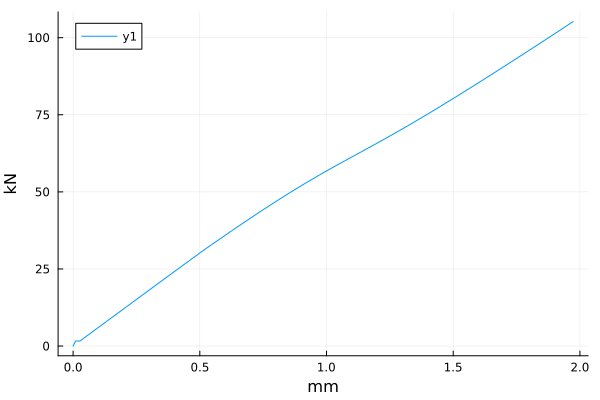

In [25]:
plot(Displacement[1:end],Load[1:end]*1e-3, xlabel = "mm", ylabel = "kN")